In [226]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

Loading image

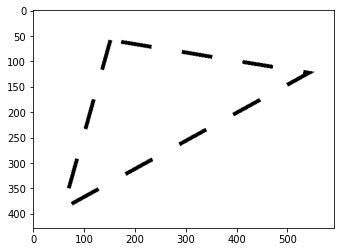

In [227]:
img = Image.open('triangle.png')
plt.imshow(img)

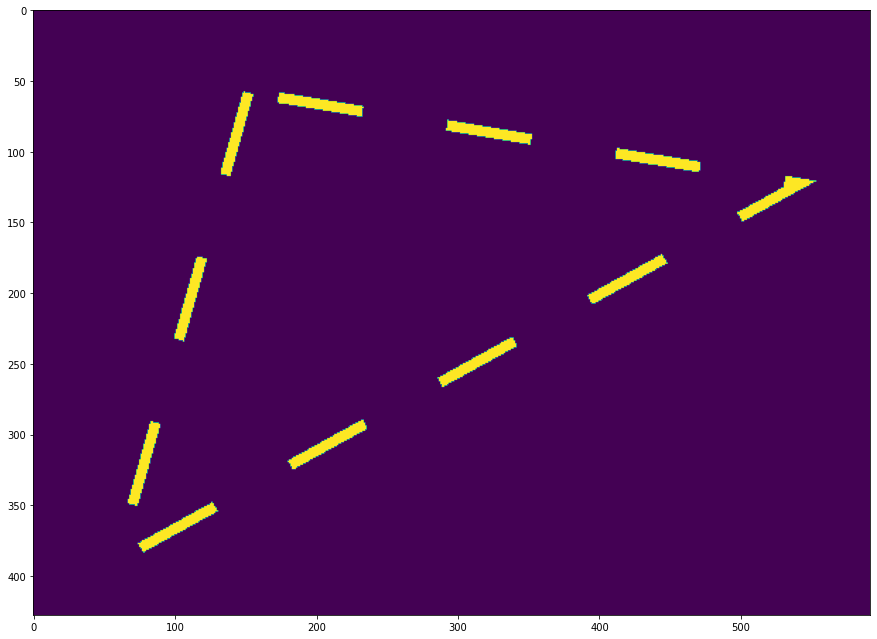

In [228]:
pixels = (np.array(img.getdata()).reshape(img.size[1], img.size[0], -1)[:, :, 0] != 255)
pixels = pixels.reshape(img.size[1], img.size[0])
plt.figure(figsize=(15, 15))
plt.imshow(pixels)

Calculating centre of mass

In [229]:
def centre_of_mass(pixels):
    x_total = 0
    y_total = 0
    points_num = 0
    for i in range(pixels.shape[0]):
        for j in range(pixels.shape[1]):
            if pixels[i, j] == True:
                x_total += i
                y_total += j
                points_num += 1
                
    return (x_total / points_num, y_total / points_num)

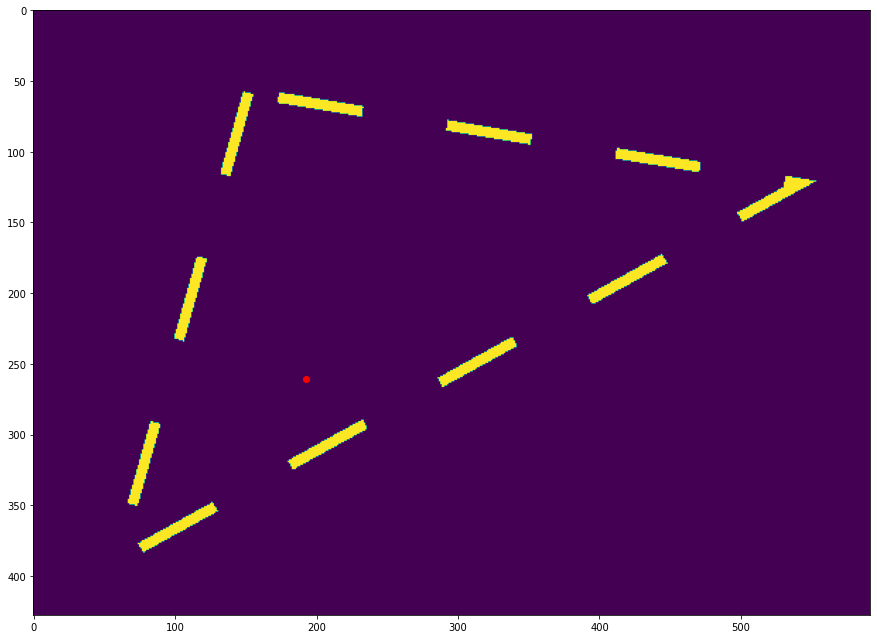

In [233]:
plt.figure(figsize=(15, 15))
plt.imshow(pixels)

centre = centre_of_mass(pixels)

plt.scatter(centre[1], centre[0], color='red')

Key idea: We can calculate minimal and maximal distance to points. This way, we distinguish circle from the rest of the figures and calculate its radius simultaneously. If the figure in not a circle, we can interatively cast lines to the closes point, draw a perpendicular line and remove the points that are "close enough". After no points are left, we can distinguish between triangle and rectangle and compute appropriate metrics.

In [239]:
import numpy as np

def deflate(image):
    '''Function that takes and image and returns array of points in the said image'''
    pixels = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if(image[i][j]):
                pixels.append((j, i))
                
    return np.array(pixels)
            

def centre_of_mass(pixels):
    '''Function that calculates centre of mass'''
    return np.sum(pixels, axis=0) / pixels.shape[0]


def distances(pixels, point):
    '''Calculate array of distances'''
    return np.linalg.norm(pixels-point, axis=1)

def get_side_vector(point, centre):
    '''Get vector that __should__ be close to the side'''
    vector = point - centre
    perpendicular = np.array([vector[1], -vector[0]])
    return perpendicular

def line_dist(point, start, vector):
    '''Get distance from point to the line'''
    return np.abs(vector[1]*point[0]-vector[0]*point[1] + vector[0]*start[1] - vector[1]*start[0]) / np.sqrt(np.sum(vector * vector))

def filter_points_out(pixels, start, vector, threshold):
    '''Leave only the points that are far enough from the approximated line'''
    left = []
    for point in pixels:
        if line_dist(point, start, vector) > threshold:
            left.append(point)
        
    return np.array(left)


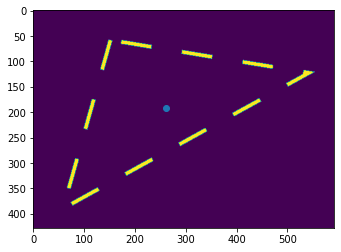

In [235]:
plt.imshow(pixels)
c = centre_of_mass(deflate(pixels))
plt.scatter(c[0], c[1])
pix = deflate(pixels)
# plt.scatter(pix[:, 0], pix[:, 1])

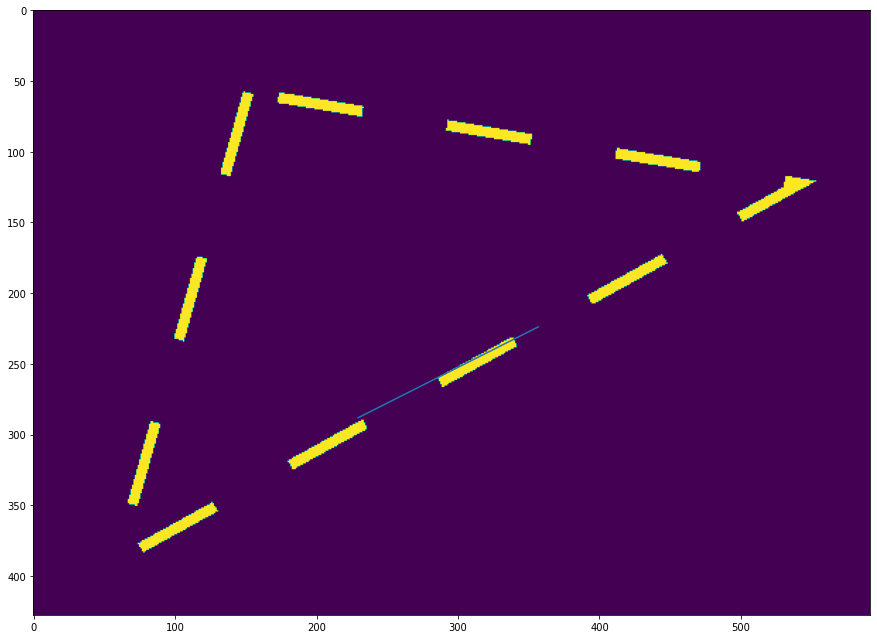

In [244]:
pix = deflate(pixels)

c = centre_of_mass(deflate(pixels))
d = distances(pix, c)

plt.figure(figsize=(15, 15))
plt.imshow(pixels)

cumulative_vector = np.array([0.0, 0.0])

for i in range(1):
    closest = pix[np.argsort(d)[i]]

    side_vec = get_side_vector(closest, c)

    
    cumulative_vector += side_vec

    # plt.scatter(c[0], c[1])
    # plt.scatter(closest[0], closest[1])

closest = closest = pix[np.argsort(d)[0]]
    
line0 = closest - cumulative_vector 
line1 = closest + cumulative_vector

plt.plot((line0[0], line1[0]), (line0[1], line1[1]))

In [245]:
pix = filter_points_out(pix, closest, cumulative_vector, 20)

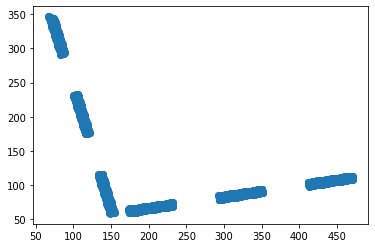

In [246]:
plt.scatter(pix[:, 0], pix[:, 1])  # Axeses are messed up, but the idea is present